Programming Exercise 1
==========

<b>Topics</b>: CNN, RNN, GNN

<b>Due Date</b>: October 21th, Friday 11:59PM

Read the instructions below and fill in the code where indicated.

The overall goal for this exercise is to understand architectures where weights are shared across space, time or to messages in a graph structure. As you are going through this exercise, try to (a) understand why a new architecture is needed, i.e. why we can't just use a feed-forward NN for everything; and (b) intuit the failure modes of a particular architecture, e.g., would a CNN stumble with image generation.

Part 1. Convolutional Neural Networks in Keras
--------------------
Implement and **RUN** a CNN in Keras using convolutional layers, dense layers, dropout, max pooling.


The inputs are 32x32 images passed as standard three-channel color so the shape of the inputs is [32, 32, 3]. Create a CNN that achieves greater than 75% validation accuracy.


Here are some components to get you started. Plot your training and validation accuracies and report the final validation accuracy score.
The portions you will complete can be located with “TO DO”.

In [11]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
# CNN model specification
'''
TO DO: Define your CNN model here with convolutional layers, dense layers, dropout, max pooling
'''
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', padding = 'same', input_shape = (32, 32, 3)),
    Conv2D(256, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128),
    Dropout(0.5),
    Dense(64),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

2022-10-21 09:51:28.665170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 09:51:28.665370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



In [14]:
# CNN model training

'''
Run the training prompt below. Feel free to modify the training pipeline
Batch size might need some tuning depending on your architecture, but 64 was found to be good for a large CNN
'''

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

/opt/homebrew/Caskroom/miniforge/base/envs/venv_tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25


2022-10-21 09:53:03.808569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 09:53:04.133869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 2.1673 - accuracy: 0.1860

2022-10-21 09:53:43.176856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 42s 53ms/step - loss: 2.1673 - accuracy: 0.1860 - val_loss: 1.9636 - val_accuracy: 0.2917
Epoch 2/25
782/782 [==============================] - 43s 56ms/step - loss: 1.9019 - accuracy: 0.2969 - val_loss: 1.7073 - val_accuracy: 0.3956
Epoch 3/25
782/782 [==============================] - 45s 57ms/step - loss: 1.6953 - accuracy: 0.3739 - val_loss: 1.5179 - val_accuracy: 0.4498
Epoch 4/25
782/782 [==============================] - 45s 57ms/step - loss: 1.5588 - accuracy: 0.4254 - val_loss: 1.4353 - val_accuracy: 0.4810
Epoch 5/25
782/782 [==============================] - 44s 57ms/step - loss: 1.4467 - accuracy: 0.4706 - val_loss: 1.3122 - val_accuracy: 0.5226
Epoch 6/25
782/782 [==============================] - 45s 57ms/step - loss: 1.3500 - accuracy: 0.5102 - val_loss: 1.2216 - val_accuracy: 0.5657
Epoch 7/25
782/782 [==============================] - 45s 57ms/step - loss: 1.2488 - accuracy: 0.5493 - val_loss: 1.1543 - val_accuracy: 0.5886
Epo

  1/313 [..............................] - ETA: 18s - loss: 0.3538 - accuracy: 0.9375

/var/folders/dt/4bs9pscx3f71pv28x850v0m80000gn/T/ipykernel_72708/2569629905.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


313/313 [==============================] - 3s 10ms/step - loss: 0.6742 - accuracy: 0.7692
Accuracy Score is  76.92%


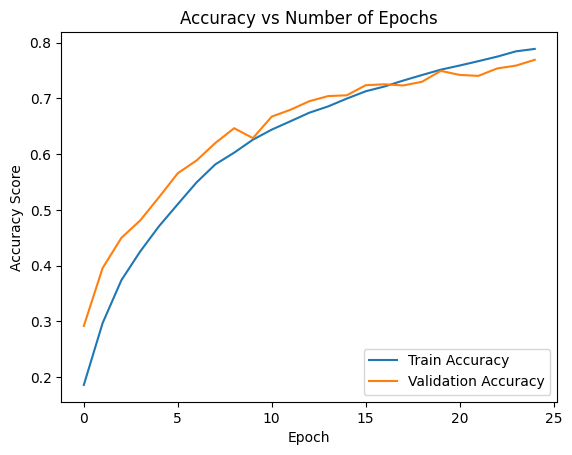

In [16]:
fig, ax = plt.subplots()
ax.plot(history.history["accuracy"], label="Train Accuracy")
ax.plot(history.history["val_accuracy"], label="Validation Accuracy")
ax.legend(loc="lower right")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy vs Number of Epochs")
fig.show()
scores = model.evaluate(X_test, y_test)
print(f"Accuracy Score is {scores[1]*100: .2f}%")

Part 2. Recurrent Neural Networks in PyTorch
--------------------
Implement and **RUN** a RNN in PyTorch.

Download and unzip this [folder](https://download.pytorch.org/tutorial/data.zip) to your current directory.

Define a RNN architecture to be used in this code block for character-by-character analysis of names to predict nationality of the individual.

The portions you will complete can be located with “TO DO”.

In [13]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path):
  return glob.glob(path)

# change this to your current directory path if you need
print(findFiles('/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/*.txt'))

import unicodedata
import string


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/*.txt'):

    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Czech.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/German.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Arabic.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Japanese.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Chinese.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Vietnamese.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Russian.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/French.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Irish.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/English.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Spanish.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Greek.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Italian.txt', '/Users/chuhanli/Documents/GitHub/CS_523/hw/data/names/Portuguese.txt', '/Users/chuhanli/Documents/GitHub/C

In [14]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [15]:
# Turning names into tensors
import torch
device = torch.device("mps")

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


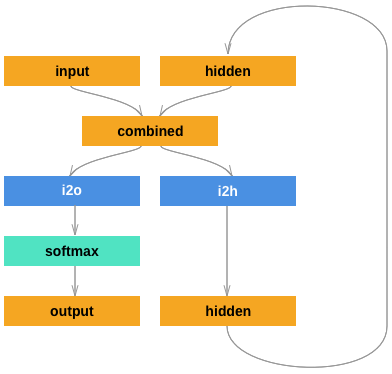

In [23]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        '''
        TO DO:
        Define your layers and activation function here, according to the recommended architecture above.
        Hint: you only need to define the blue (LINEAR) and green (ACTIVATION) layers
        ''' 
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.Softmax(1)

    def forward(self, input, hidden):
        '''
        TO DO:
        Define your forward pass.
        Hint: follow the arrows.
        '''
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        # output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

To run a step of this network we need to pass an input (in our case, the Tensor for the current letter) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of each language) and a next hidden state (which we keep for the next step).

In [24]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. This could be further optimized by pre-computing batches of Tensors.

In [25]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-0.0211, -0.0681,  0.0217, -0.0336,  0.0141,  0.0792, -0.0839,  0.0693,
         -0.0726,  0.1282, -0.0480,  0.0099, -0.1068,  0.0343, -0.0603, -0.0353,
         -0.1254,  0.1139]], grad_fn=<AddmmBackward0>)


In [26]:
# Helper functions

'''
Here we interpret the output of the network, which we know to be a likelihood of each category.
We can use Tensor.topk to get the index of the greatest value
'''

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

'''
Quickly get training example
'''
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

('English', 9)
category = Korean / line = Noh
category = Irish / line = Macclelland
category = Portuguese / line = Serafim
category = Spanish / line = Obando
category = English / line = Rose
category = Greek / line = Vlahos
category = Vietnamese / line = Hoang
category = Chinese / line = Deng
category = French / line = Chevalier
category = German / line = Ursler


In [27]:
'''
TO DO:
Define your loss function based on the activation layer of your RNN
'''
criterion = nn.CrossEntropyLoss()

In [28]:
# Training block

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()


import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 1s) 2.5793 Ko / Korean ✓
10000 10% (0m 3s) 3.0723 Kawasie / Russian ✗ (Japanese)
15000 15% (0m 4s) 1.5113 Handal / Arabic ✓
20000 20% (0m 6s) 3.1487 Zipperer / Dutch ✗ (Czech)
25000 25% (0m 7s) 0.9248 Robertson / Scottish ✓
30000 30% (0m 9s) 0.2523 Drivakis / Greek ✓
35000 35% (0m 10s) 2.6476 Hunter / German ✗ (Scottish)
40000 40% (0m 12s) 0.4316 Naomhan / Irish ✓
45000 45% (0m 13s) 0.6172 Ta / Vietnamese ✓
50000 50% (0m 15s) 0.8853 Que / Chinese ✓
55000 55% (0m 16s) 0.7720 Huber / German ✓
60000 60% (0m 18s) 0.6256 Totah / Arabic ✓
65000 65% (0m 19s) 1.7052 Oliver / German ✗ (French)
70000 70% (0m 21s) 1.8708 Mata / Japanese ✗ (Portuguese)
75000 75% (0m 22s) 0.5170 Lillis / Greek ✓
80000 80% (0m 24s) 0.5842 Calpis / Greek ✓
85000 85% (0m 25s) 1.0438 Evangelista / Portuguese ✗ (Italian)
90000 90% (0m 27s) 0.4031 Joubert / French ✓
95000 95% (0m 28s) 0.2328 Vuong / Vietnamese ✓
100000 100% (0m 30s) 1.1978 Sortras / Portuguese ✗ (Greek)


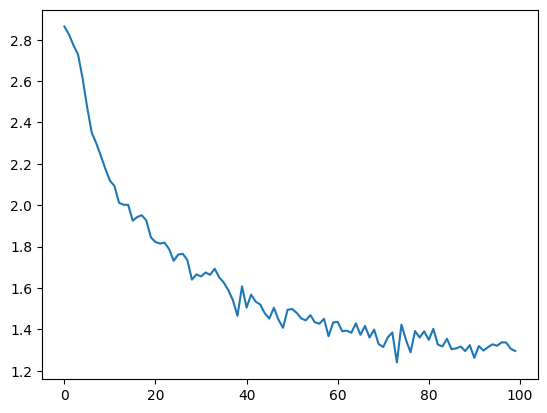

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

/var/folders/dt/4bs9pscx3f71pv28x850v0m80000gn/T/ipykernel_16054/1670990186.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/dt/4bs9pscx3f71pv28x850v0m80000gn/T/ipykernel_16054/1670990186.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


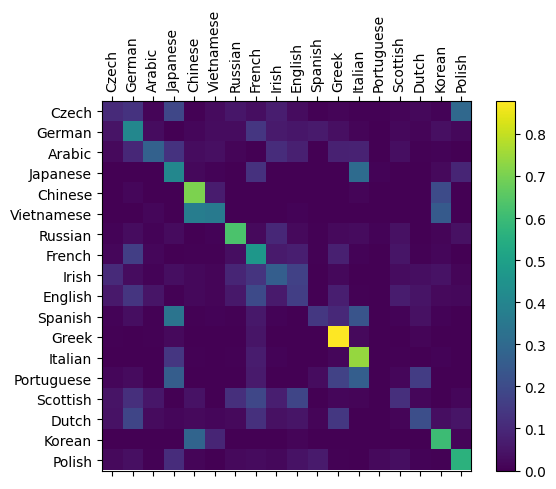

In [14]:
# Evaluating the results

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [15]:
# Test it yourself

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dostoevsky')
predict('Martineau')
predict('Papadimitriou')


> Dostoevsky
(4.27) Russian
(3.47) Polish
(2.67) English

> Martineau
(2.39) French
(1.66) Greek
(1.49) Polish

> Papadimitriou
(3.25) Greek
(2.72) French
(2.61) Russian


Part 3. Graph Neural Networks in DGL
--------------------

Adapt from Tutorial 4 on the DGL library for Graph Neural Networks to a new dataset: CORA (refer to documentation [here](https://relational.fit.cvut.cz/dataset/CORA)). Your goal is to classify the nodes in this research paper dataset.

Fill in the TO DO parts where the code is missing, to define your GNN architecture. This requires you to reason about the dimensionality of the features and labels in this problem.

In [6]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

gcn_msg = fn.copy_u(u='h', out='m')
gcn_reduce = fn.sum(msg='m', out='h')

In [7]:
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        """
        TO DO:
        Define a single Linear layer here
        """
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, feature):
        # Creating a local scope so that all the stored ndata and edata
        # (such as the `'h'` ndata below) are automatically popped out
        # when the scope exits.
        with g.local_scope():
            """
            TO DO:
            Define the forward pass to pass and accummulate messages
            """
            g.ndata['h'] = feature
            g.update_all(gcn_msg, gcn_reduce)
            h = g.ndata['h']
            return self.linear(h)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        """
        Define 2 layers of the GCNLayer type you just coded above.
        Refer to the documentation of the CORA dataset (https://relational.fit.cvut.cz/dataset/CORA):
        what should be the input dimension of each node's vector?
        what should be the final output dimension for this classification task?
        """
        # input feature size is 1433, output feature size is 7
        self.layer1 = GCNLayer(1433, 5429)
        self.layer2 = GCNLayer(5429, 7)
    
    def forward(self, g, features):
        """
        Define your forward pass with a ReLU activation between the 2 layers
        """
        x = F.relu(self.layer1(g, features))
        x = self.layer2(g, x)
        return x

net = Net()
print(net)

Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=1433, out_features=5429, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=5429, out_features=7, bias=True)
  )
)


In [9]:
# CORA dataset (https://relational.fit.cvut.cz/dataset/CORA)

from dgl.data import CoraGraphDataset
def load_cora_data():
    dataset = CoraGraphDataset()
    g = dataset[0]
    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    test_mask = g.ndata['test_mask']
    return g, features, labels, train_mask, test_mask

# Helper function to evaluate performance

def evaluate(model, g, features, labels, mask):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

If your code above is correct, when you run the training loop below you should see loss decrease, and test accuracy increase.

In [10]:
# Training loop

import time
import numpy as np
g, features, labels, train_mask, test_mask = load_cora_data()
# Add edges between each node and itself to preserve old node representations
g.add_edges(g.nodes(), g.nodes())
optimizer = th.optim.Adam(net.parameters(), lr=1e-2)
dur = []
for epoch in range(50):
    if epoch >=3:
        t0 = time.time()

    net.train()
    logits = net(g, features)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[train_mask], labels[train_mask])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch >=3:
        dur.append(time.time() - t0)
    
    acc = evaluate(net, g, features, labels, test_mask)
    print("Epoch {:05d} | Loss {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
            epoch, loss.item(), acc, np.mean(dur)))

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Epoch 00000 | Loss 1.9561 | Test Acc 0.2460 | Time(s) nan
Epoch 00001 | Loss 3.0354 | Test Acc 0.5140 | Time(s) nan
Epoch 00002 | Loss 6.2829 | Test Acc 0.4330 | Time(s) nan
Epoch 00003 | Loss 2.3805 | Test Acc 0.4730 | Time(s) 0.1617
Epoch 00004 | Loss 1.2220 | Test Acc 0.6450 | Time(s) 0.1612
Epoch 00005 | Loss 0.8070 | Test Acc 0.7530 | Time(s) 0.1609
Epoch 00006 | Loss 0.6203 | Test Acc 0.7830 | Time(s) 0.1627
Epoch 00007 | Loss 0.4686 | Test Acc 0.7700 | Time(s) 0.1629
Epoch 00008 | Loss 0.2589 | Test Acc 0.7410 | Time(s) 0.1653
Epoch 00009 | Loss 0.2401 | Test Acc 0.7580 | Time(s) 0.1646
Epoch 00010 | Loss 0.0962 | Test Acc 0.7700 | Time(s) 0.1641
Epoch 00011 | Loss 0.0389 | Test Acc 0.7730 | Time(s) 0.1638
Epoch 00012 | Loss 0.0211 | Test Acc 0.7590 | Time(s) 0.1635
Epoch 00013 | Loss 0.0139 | Test A

Mathematically, the GCN model follows this formula:

$H^{(l+1)} = \sigma(\tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{-\frac{1}{2}}H^{(l)}W^{(l)})$

Here, $H^{(l)}$ denotes the $l^{th}$ layer in the network,
$\sigma$ is the non-linearity, and $W$ is the weight matrix for
this layer. $\tilde{D}$ and $\tilde{A}$ are separately the degree
and adjacency matrices for the graph. With the superscript ~, we are referring
to the variant where we add additional edges between each node and itself to
preserve its old representation in graph convolutions. The shape of the input
$H^{(0)}$ is $N \times D$, where $N$ is the number of nodes
and $D$ is the number of input features. We can chain up multiple
layers as such to produce a node-level representation output with shape
$N \times F$, where $F$ is the dimension of the output node
feature vector.